In [37]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# The length of time to import the data into a df takes around 40s in .py files and "Execute Selection" was not working properly.
# The VS Code is to import the file to a df only once
Diffusion_Data = pd.read_excel("1.000_to_1.200_Diff_Conts_30001_DataPts_1000_Time.xlsx")

In [3]:
Diffusion_Data

,D,Time,R_T_Diff_Con,Std_Dev,Var,Ini_Pos,Final_Pos,Pos_Difference
0,112,1000,1.0,473.286383,224000,15500,15830.801033,-330.801033
1,112,1000,1.0,473.286383,224000,15500,15200.373347,299.626653
2,112,1000,1.0,473.286383,224000,15500,14985.846244,514.153756
3,112,1000,1.0,473.286383,224000,15500,15588.844939,-88.844939
4,112,1000,1.0,473.286383,224000,15500,15114.425954,385.574046
...,...,...,...,...,...,...,...,...
629995,112,1000,1.2,473.286383,224000,15500,14823.323190,676.676810
629996,112,1000,1.2,473.286383,224000,15500,15128.136311,371.863689
629997,112,1000,1.2,473.286383,224000,15500,14806.937938,693.062062
629998,112,1000,1.2,473.286383,224000,15500,16343.913228,-843.913228


In [4]:
# Get the column titles for use in pandas functions
pos_diff = Diffusion_Data.columns[-1]
diff_const = Diffusion_Data.columns.values[2]
# Diffusion_Data2 will have outliers filtered out, while Diffusion_Data is unfiltered.
Diffusion_Data2 = Diffusion_Data

In [5]:
describe_diff_by_const = Diffusion_Data.groupby(diff_const)[pos_diff].describe()
# Before removing outliers get a count of the number of datapoints
count = describe_diff_by_const.iloc[0, 0]
# Remove outliers which are > 3*std
describe_diff_by_const['3*std'] = describe_diff_by_const['std']*3
describe_diff_by_const.sort_values(by='std', ascending=True)

,count,mean,std,min,25%,50%,75%,max,3*std
R_T_Diff_Con,,,,,,,,,
1.00,30000.0,-2.017339,455.735917,-1837.482887,-307.955386,-3.762467,304.785460,1774.805126,1367.207751
1.01,30000.0,-1.047931,459.196032,-1977.908452,-309.220800,3.288514,307.475648,2040.588674,1377.588097
1.02,30000.0,2.238489,461.386629,-2063.931590,-306.791813,5.889725,311.991341,2224.350269,1384.159886
1.03,30000.0,1.937430,463.291378,-2015.099406,-314.963517,2.062668,315.467150,1932.678587,1389.874134
1.04,30000.0,-1.708151,465.129498,-2158.876465,-314.733844,-0.832869,309.732618,2078.094411,1395.388495
1.05,30000.0,-2.505575,467.737312,-1926.601367,-316.438309,-6.177694,314.103679,1877.600987,1403.211937
1.06,30000.0,0.408245,473.766322,-1999.923631,-318.553696,-0.905216,315.680477,1883.272786,1421.298965
1.07,30000.0,3.085823,474.127636,-1766.524702,-317.341798,1.277675,323.067878,1930.972628,1422.382907
1.09,30000.0,1.478966,477.034501,-1767.388175,-321.091862,4.456678,323.053679,1806.024867,1431.103504


In [6]:
# Filter out datapoints that are greater than 3xSD
describe_diff_by_const = Diffusion_Data2.groupby(diff_const)[pos_diff].describe()
filtered_pos = pd.Series()
for x in describe_diff_by_const.index:
    alpha_pos_val = Diffusion_Data2[pos_diff].loc[Diffusion_Data2['R_T_Diff_Con'] == x]
    alpha_pos_val = alpha_pos_val.loc[stats.zscore(np.abs(alpha_pos_val)) <= 3]
    filtered_pos = pd.concat([filtered_pos, alpha_pos_val])
Diffusion_Data2 = Diffusion_Data2[Diffusion_Data2[pos_diff].isin(filtered_pos)]

C:\Users\Mike\AppData\Local\Temp\ipykernel_13860\3672272254.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filtered_pos = pd.Series()


In [7]:
# 95% of sample means will be expected to lie within a confidence interval of ±1.96 standard errors of the sample mean
describe_diff_by_const['std_error'] = describe_diff_by_const['std']/np.sqrt(describe_diff_by_const['count'])
describe_diff_by_const['95%_conf_int'] = describe_diff_by_const['std_error'] * 1.96
# Filter out the means that are not within the 95% confidence interval of the standard error.
describe_diff_by_const = describe_diff_by_const[np.abs(describe_diff_by_const['mean']) < describe_diff_by_const['95%_conf_int']]
# Get a list of constants that are within in the interval.
describe_diff_by_const_list = describe_diff_by_const.reset_index().iloc[:, 0]

In [8]:
# Now filter out those constants that are not in the dataframe by only selecting constants in the list.
Diffusion_Data2 = Diffusion_Data2[Diffusion_Data2[diff_const].isin(describe_diff_by_const_list)]

In [21]:
# All outliers greater than 3*std, and means that are not within the 95% confidence interval of the standard error have been filtered out.
describe_diff_by_const = Diffusion_Data2.groupby(diff_const)[pos_diff].describe()
describe_diff_by_const['3*std'] = describe_diff_by_const['std']*3 # New value after outliers removed.
describe_diff_by_const['theor_std_error'] = Diffusion_Data['Std_Dev'][0]/np.sqrt(count) # now use "count" calculated before datapoints were filtered.
describe_diff_by_const['std_error'] = describe_diff_by_const['std']/np.sqrt(describe_diff_by_const['count'])
describe_diff_by_const['95%_conf_int'] = describe_diff_by_const['std_error'] * 1.96
# Calculate the Bhattacharyya Distance between the calculated and theoretical normal distributions to see which is the closest fit.
describe_diff_by_const['bhattacharyya'] = 0.25*((describe_diff_by_const['mean'] - 0)**2)/(describe_diff_by_const['std']**2 + (Diffusion_Data['Std_Dev'][0])**2) + 0.5*np.log(((describe_diff_by_const['std'])**2 + (Diffusion_Data['Std_Dev'][0])**2)/(2*(describe_diff_by_const['std'])*(Diffusion_Data['Std_Dev'][0])))
describe_diff_by_const['t-test'] = [(stats.ttest_1samp(Diffusion_Data2[Diffusion_Data2[diff_const] == x][pos_diff], popmean=0)) for x in describe_diff_by_const.index.values]
describe_diff_by_const['shapiro'] = [stats.shapiro(Diffusion_Data2[Diffusion_Data2[diff_const] == x][pos_diff]) for x in describe_diff_by_const.index.values]
describe_diff_by_const.sort_values(by='bhattacharyya')

c:\Users\Mike\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,count,mean,std,min,25%,50%,75%,max,3*std,theor_std_error,std_error,95%_conf_int,bhattacharyya,t-test,shapiro
R_T_Diff_Con,,,,,,,,,,,,,,,
1.16,29721.0,-0.938935,474.344574,-1281.054628,-331.867952,-1.871423,327.520385,1282.413132,1423.033722,2.73252,2.751454,5.392849,0.000002,"(-0.34125035660271014, 0.7329175292739332)","(0.9979544878005981, 3.792543233927732e-19)"
1.15,29748.0,-1.792413,473.098462,-1268.128173,-328.769690,-2.151799,326.228621,1270.050206,1419.295386,2.73252,2.742980,5.376241,0.000002,"(-0.6534545019533319, 0.513468362819663)","(0.9976521134376526, 1.1566481853406758e-20)"
1.13,29723.0,-1.355316,471.400168,-1272.257419,-328.878843,-3.870031,321.075031,1274.151035,1414.200505,2.73252,2.734283,5.359194,0.000005,"(-0.495675051798436, 0.6201273564949972)","(0.9978283047676086, 8.543533664284239e-20)"
1.14,29711.0,-1.641444,470.226340,-1275.155326,-329.219293,-4.871663,318.833319,1275.388158,1410.679021,2.73252,2.728025,5.346929,0.000012,"(-0.6016968128073208, 0.5473805631482833)","(0.9978911280632019, 1.7942618943662368e-19)"
1.10,29734.0,1.111386,468.135242,-1258.879080,-324.608834,3.718820,326.335024,1259.752662,1404.405727,2.73252,2.714843,5.321092,0.000031,"(0.4093739101000706, 0.6822682319391695)","(0.9977600574493408, 3.881463598813534e-20)"
1.17,29725.0,-2.384679,481.008643,-1298.346065,-338.815181,-1.107185,332.841693,1298.522407,1443.025929,2.73252,2.789921,5.468246,0.000069,"(-0.8547478461838368, 0.3926976454102796)","(0.9977833032608032, 5.089046157386373e-20)"
1.11,29732.0,3.085819,465.403655,-1257.834690,-317.426303,1.335302,324.635229,1258.915773,1396.210965,2.73252,2.699092,5.290221,0.000076,"(1.1432804039208833, 0.25293139405905674)","(0.9980971217155457, 2.192903159968145e-18)"
1.18,29731.0,0.952187,482.210576,-1300.236309,-332.168231,2.734369,333.269412,1300.320796,1446.631729,2.73252,2.796610,5.481356,0.000088,"(0.34047902772405064, 0.7334982195070658)","(0.9978824853897095, 1.5967917809178374e-19)"
1.09,29728.0,1.642538,460.588184,-1242.062547,-317.360374,4.532991,319.704981,1242.660852,1381.764551,2.73252,2.671345,5.235836,0.000186,"(0.6148730255482601, 0.5386432844782192)","(0.9978053569793701, 6.535460315727706e-20)"


In [ ]:
# Calculate the Bhattacharyya Distance between the calculated and theoretical normal distributions to see which is the closest fit.
# DB = 0.25*((mean_p - mean_q)**2)/(std_p**2 + std_q**2) + 0.5*np.log((std_p**2 + std_q**2)/(2*std_p*std_q))

c:\Users\Mike\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9978204965591431, pvalue=7.731604840510012e-20)

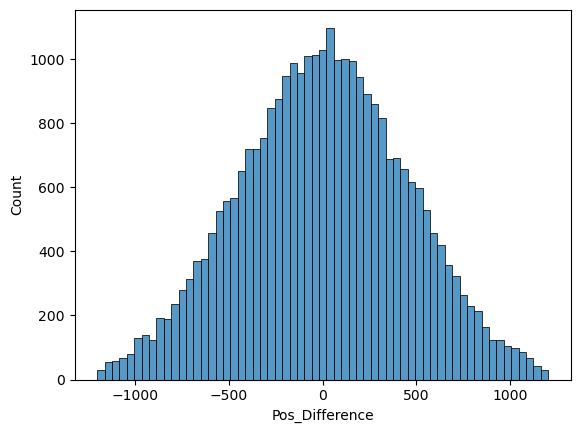

In [38]:
hist_data = Diffusion_Data2[pos_diff].loc[Diffusion_Data2[diff_const] == 1.02]
sb.histplot(hist_data)
stats.shapiro(hist_data)

In [25]:
# Collect only diffusion data for one specific constant
hist_data = Diffusion_Data2[pos_diff].loc[Diffusion_Data2[diff_const] == 1.16]

In [54]:
# Make a histogram distribution out of the data collectied for the Kolmogorov–Smirnov test.
diff_const_hist = np.histogram(hist_data, bins=100, density=True)
# Find the line spacing between the bins.
dx = diff_const_hist[1][1] - diff_const_hist[1][0]
# The cumulative stepwise constant function of histogram to compare to theoretical.
diff_const_hist_CDF = [np.cumsum(diff_const_hist[0]*dx)]
# d is linespace, make a CDF for theoretical KS test.
bins = diff_const_hist[1]
d = np.linspace(min(bins), max(bins), 5000, dtype=int)
# The mean of the distribution is set to 0.
# Diffusion_Data['Std_Dev'][0] is a value for the theoretical standard deviation.
KS_theor_hist = stats.norm.cdf(d, 0, Diffusion_Data['Std_Dev'][0])
# Compare the theoretical "KS_Theor_Res" to the collected dp stepwise distribution "KS_MC_Res_CDF"
KS_Test_Result = stats.kstest(diff_const_hist_CDF[0], KS_theor_hist)

# If the p-value is smaller than your chosen significance level (e.g., 0.05) then the distributions are 'statistically
# different'. At the same time however, larger samples will more easily detect even the smallest differences between
# two distributions. So you could interpret smaller KS test statistics as 'less different',
# and larger ones as 'more different', roughly speaking

# The Kolmogorov–Smirnov test can be modified to serve as a goodness of fit test. In the special case of testing for
# normality of the distribution, samples are standardized and compared with a standard normal distribution.
# This is equivalent to setting the mean and variance of the reference distribution equal to the sample estimates.

# The KS-D level would be c(alpha)*sqrt((N1 + N2)/N1*N2) with N1 and N2 being the sample sizes and:
# α	    0.10	0.05	0.025	0.01	0.005	0.001  With lowering significance level,
# c(α)	1.22	1.36	1.48	1.63	1.73	1.95   The null hypothesis gets harder to reject
# The null hypothesis, (that the distribution of datapoints for a constant is the same as the theoretical distribution),
# is rejected at level α if KS-D > c(α)*sqrt((N1 + N2)/N1*N2).
# Theoretical distribution has 5000 datapoints in linspace, while histogram has 100 bins.
# Statistic at c(0.05) is 1.36*sqrt((5000 + 100)/500,000) = 0.137

print(f"The KS Statistic result is {KS_Test_Result[0]}")
print(f"The KS p-value result is {KS_Test_Result[1]}")

The KS Statistic result is 0.06
The KS p-value result is 0.8518252124261557


-1201.5593428529355 1202.5936642811084


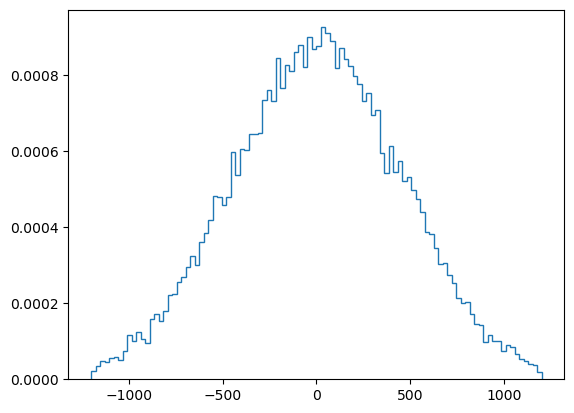

In [53]:
diff_const_hist = np.histogram(hist_data, bins=100, density=True)
plot, ax = plt.subplots()
# 0 for counts, 1 for bins
ax = plt.stairs(diff_const_hist[0], diff_const_hist[1])
bins = diff_const_hist[1]
print(min(bins), max(bins))
plt.show()

In [55]:
KS_df = pd.DataFrame(columns=[['alpha', 'D']])
KS_df['alpha'] = [0.100, 0.050, 0.025, 0.010, 0.005, 0.001]
ksd_dp_multiplier = np.sqrt((len(d) + len(diff_const_hist[0]))/ (len(d)*len(diff_const_hist[0])) ) # The RHS of the KS-D level equation to multiply by c(α)
KS_df['D'] = [1.22*ksd_dp_multiplier, 1.36*ksd_dp_multiplier, 1.48*ksd_dp_multiplier, 1.63*ksd_dp_multiplier, 1.73*ksd_dp_multiplier, 1.95*ksd_dp_multiplier]
KS_df

,alpha,D
0,0.100,0.123214
1,0.050,0.137353
2,0.025,0.149473
3,0.010,0.164622
4,0.005,0.174721
5,0.001,0.196940


In [56]:
# Combine everything described above into a for loop to cycle between all constants.
# Generate a list of which constants pass the Kolmogorov–Smirnov test.
KS_const_results_df = []
for x in describe_diff_by_const.index:
    # For diffusion constant x, make a histogram of the data collected.
    hist_data = Diffusion_Data2[pos_diff].loc[Diffusion_Data2[diff_const] == x]
    # Make a histogram distribution out of the data collectied for the Kolmogorov–Smirnov test.
    diff_const_hist = np.histogram(hist_data, bins=100, density=True)
    # Find the line spacing between the bins.
    dx = diff_const_hist[1][1] - diff_const_hist[1][0]
    # The cumulative stepwise constant function of histogram to compare to theoretical.
    diff_const_hist_CDF = [np.cumsum(diff_const_hist[0]*dx)]
    # d is linespace, make a CDF for theoretical KS test.
    bins = diff_const_hist[1]
    d = np.linspace(min(bins), max(bins), 5000, dtype=int)
    # The mean of the distribution is set to 0.
    # Diffusion_Data['Std_Dev'][0] is a value for the theoretical standard deviation.
    KS_theor_hist = stats.norm.cdf(d, 0, Diffusion_Data['Std_Dev'][0])
    # Compare the theoretical "KS_Theor_Res" to the collected dp stepwise distribution "KS_MC_Res_CDF"
    KS_Test_Result = stats.kstest(diff_const_hist_CDF[0], KS_theor_hist)
    for i in KS_df.index:
        if KS_Test_Result[0] < KS_df.loc[i,'D'][0] and KS_Test_Result[1] > KS_df.loc[i,'alpha'][0]:
            ks_dict = {'const': x, 'test-D': KS_Test_Result[0], 'KS-D': KS_df.loc[i,'D'][0], 'p': KS_Test_Result[1], 'alpha': KS_df.loc[i,'alpha'][0]}
            KS_const_results_df.append(ks_dict)
            break
KS_const_results_df = pd.DataFrame(KS_const_results_df)
KS_const_results_df.sort_values(by=['test-D'], ascending=False)

,const,test-D,KS-D,p,alpha
0,1.00,0.0700,0.123214,0.697118,0.1
1,1.01,0.0700,0.123214,0.697118,0.1
3,1.03,0.0654,0.123214,0.771902,0.1
4,1.04,0.0622,0.123214,0.820679,0.1
2,1.02,0.0600,0.123214,0.851825,0.1
6,1.06,0.0600,0.123214,0.851825,0.1
7,1.07,0.0600,0.123214,0.851825,0.1
5,1.05,0.0594,0.123214,0.859911,0.1
9,1.09,0.0532,0.123214,0.930865,0.1
8,1.08,0.0514,0.123214,0.946593,0.1


0.9999998723584483


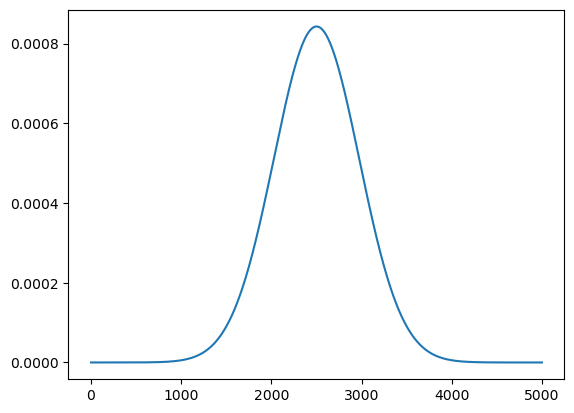

In [28]:
import matplotlib.pyplot as plt
d = np.linspace(- 2500, 2500, 5000, dtype=int)
KS_theor_hist = stats.norm.pdf(d, 0, Diffusion_Data['Std_Dev'][0])
print(sum(KS_theor_hist))
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(KS_theor_hist)
plt.show()

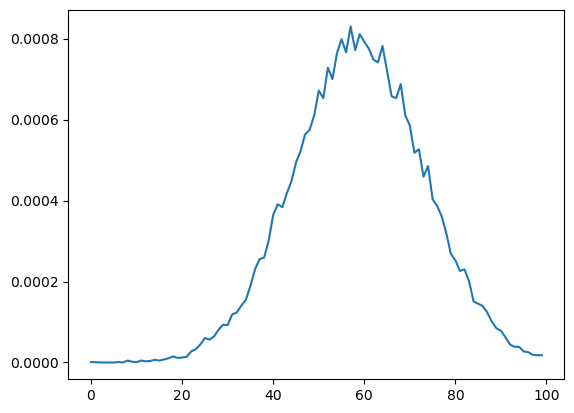

In [34]:
import matplotlib.pyplot as plt
# Make a histogram distribution out of the data collectied for the Kolmogorov–Smirnov test.
diff_const_hist = np.histogram(hist_data, bins=100, density=True)
# Find the line spacing between the bins.
dx = diff_const_hist[1][1] - diff_const_hist[1][0]
# The cumulative stepwise constant function of histogram to compare to theoretical.
diff_const_hist_CDF = [np.cumsum(diff_const_hist[0]*dx)]
# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(diff_const_hist[0])
plt.show()